In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.6MB/s 
     |████████████████████████████████| 2.0MB 7.6MB/s 
     |████████████████████████████████| 14.2MB 212kB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 215kB 47.1MB/s 
     |████████████████████████████████| 1.7MB 27.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 44.1MB/s 
     |████████████████████████████████| 245kB 48.3MB/s 
     |████████████████████████████████| 276kB 45.8MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 153kB 42.2MB/s 
     |████████████████████████████████| 1.1MB 38.0MB/s 
     |████████████████████████████████| 378kB 47.2MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 


In [2]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                trendline_color_override = 'red', title = 'DIAMOND - CASE STUDY')
fig.show()

In [5]:
fig = px.histogram(data, x=['Price'], template='plotly_dark', title = 'Histogram of Price')
fig.show()

In [7]:
import numpy as np
data_copy = data.copy()
data_copy['Log_Price'] = np.log(data['Price'])

fig = px.histogram(data_copy, x=['Log_Price'], title='Histogram of Log Price', template='plotly_dark')
fig.show()

### Data Preparation

In [9]:
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 123, transform_target = True)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


Model Training

In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,621.1882,1.654823e+06,1265.7816,0.9842,0.0660,0.0484,0.135
gbr,Gradient Boosting Regressor,740.1037,2.011708e+06,1411.9739,0.9804,0.0762,0.0567,0.307
et,Extra Trees Regressor,725.8570,2.087627e+06,1415.4258,0.9803,0.0795,0.0586,1.309
rf,Random Forest Regressor,714.8950,2.115390e+06,1423.6177,0.9801,0.0783,0.0569,1.216
dt,Decision Tree Regressor,942.9315,3.569657e+06,1862.1598,0.9660,0.1040,0.0754,0.039
ada,AdaBoost Regressor,2043.0557,1.716209e+07,4095.5957,0.8369,0.1921,0.1546,0.268
knn,K Neighbors Regressor,3048.0754,3.722114e+07,6071.1886,0.6412,0.3670,0.2324,0.090
omp,Orthogonal Matching Pursuit,3369.8423,7.987105e+07,8684.4303,0.2372,0.2840,0.2244,0.027
lasso,Lasso Regression,6578.1965,1.161719e+08,10753.0809,-0.1245,0.7132,0.5636,0.028
llar,Lasso Least Angle Regression,6578.1973,1.161718e+08,10753.0775,-0.1245,0.7132,0.5636,0.028


In [18]:
plot_model(best, plot='residuals_interactive')

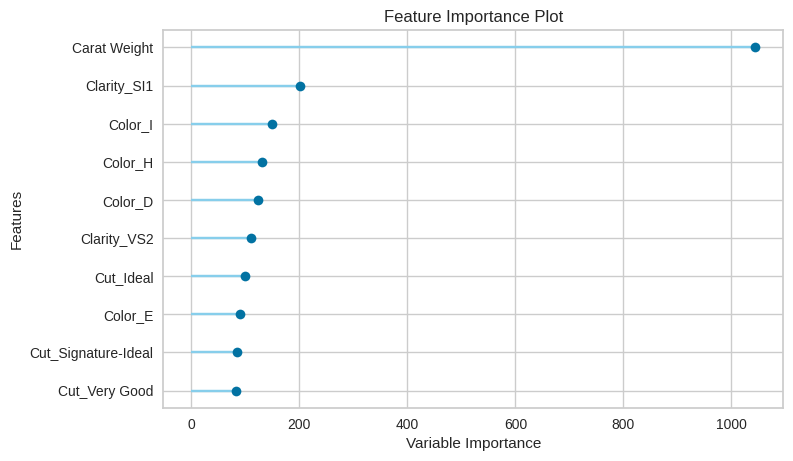

In [17]:
plot_model(best, plot='feature')

Finalize & Save Model

In [19]:
final_best = finalize_model(best)

In [20]:
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    